# **CLASE 7: Clasifición binaria (Random Forest y la reducción del error).**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
ruta_archivo = "/content/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(ruta_archivo)

# **Preprocesamiento**

In [5]:
X = df[['MonthlyCharges','TotalCharges']]
y = df['Churn']
# Convertimos a numérico forzando errores a NaN (por si hay espacios en blanco)
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')
X['TotalCharges'] = X['TotalCharges'].fillna(X['TotalCharges'].mean())
# Convertimos a binaria
y = df['Churn'].map({'Yes': 1, 'No': 0})
# 5. DIVISIÓN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## **Entrenamiento de un Árbol de Decisión para comparación**

In [6]:
modelo_tree = DecisionTreeClassifier(max_depth=3, random_state=42, criterion='entropy')
modelo_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

## **ENTRENAMIENTO DEL "BOSQUE"**
Creamos un bosque de 100 árboles

In [7]:
modelo_forest = RandomForestClassifier(n_estimators=100,
                                       max_depth=5,
                                       random_state=42)
modelo_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

## **EVALUACIÓN**

In [9]:
predicciones_arbol = modelo_tree.predict(X_test)
print("--- RENDIMIENTO DEL ÁRBOL ---")
print(classification_report(y_test, predicciones_arbol))
print("=" * 60)
predicciones_bosque = modelo_forest.predict(X_test)
print("--- RENDIMIENTO DEL BOSQUE ---")
print(classification_report(y_test, predicciones_bosque))

--- RENDIMIENTO DEL ÁRBOL ---
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1539
           1       0.66      0.39      0.49       574

    accuracy                           0.78      2113
   macro avg       0.73      0.65      0.67      2113
weighted avg       0.76      0.78      0.76      2113

--- RENDIMIENTO DEL BOSQUE ---
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1539
           1       0.68      0.43      0.52       574

    accuracy                           0.79      2113
   macro avg       0.75      0.68      0.69      2113
weighted avg       0.78      0.79      0.77      2113



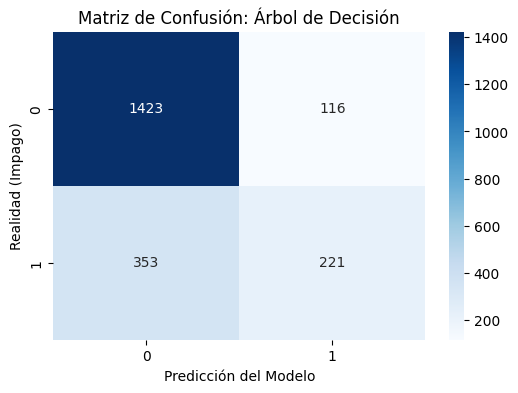

In [10]:
cm = confusion_matrix(y_test, predicciones_arbol)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción del Modelo')
plt.ylabel('Realidad (Impago)')
plt.title('Matriz de Confusión: Árbol de Decisión')
plt.show()

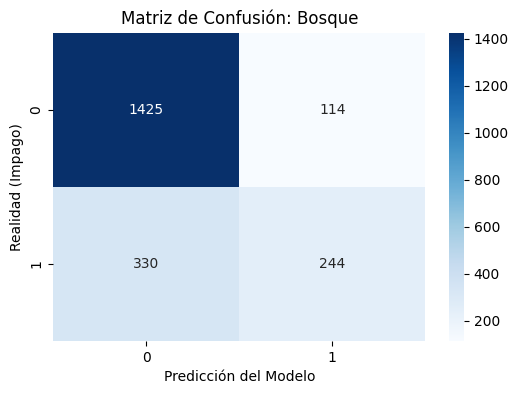

In [11]:
cm = confusion_matrix(y_test, predicciones_bosque)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción del Modelo')
plt.ylabel('Realidad (Impago)')
plt.title('Matriz de Confusión: Bosque')
plt.show()

## **IMPORTANCIA DE VARIABLES**
Lo que interpretamos con mayor facilidad

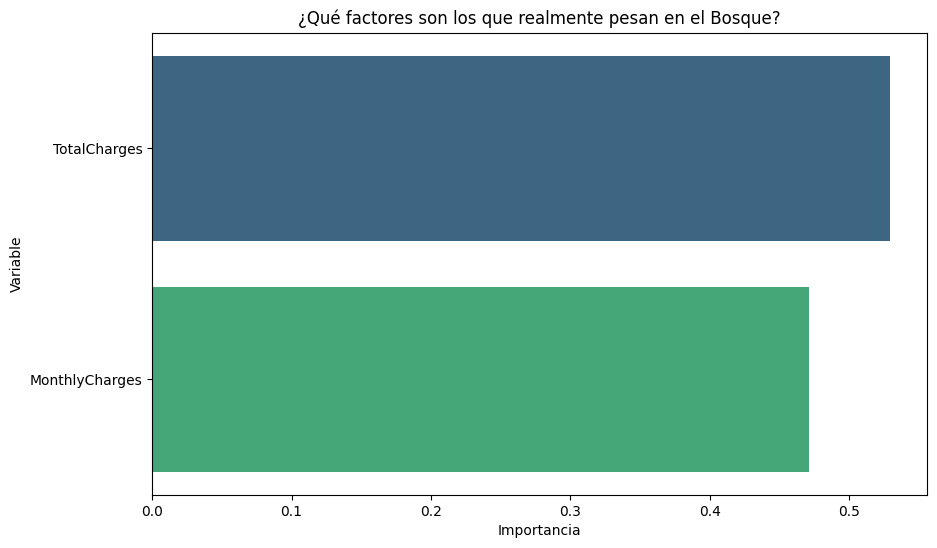

In [12]:
importancias = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': modelo_forest.feature_importances_
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importancia', y='Variable', data=importancias, palette='viridis')
plt.title('¿Qué factores son los que realmente pesan en el Bosque?')
plt.show()